In [2]:
from matplotlib import pyplot
from scipy import stats
import numpy as np
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import seaborn as sns
##################Extract Output from Output file#########################
n_samples=50#0-49
n_pow=81#0-80

file1 = open("POWER","r+")
Out=file1.read().split()
	
# Number of rows = 50 (ie, number of Samples), each column belongs to a different Samples]
# so, all the rows of a column is my Sample space
CLASS0=[]
CLASS1=[]
i=0
for i in range(n_samples):
	s="CLASS0_SAMPLE"+str(i)
	m=Out.index(s)
	Out=Out[m+1:]
	tem=[]
	for x in range(n_pow):
		s="*POW"+str(x)
		m=Out.index(s)
		tem.append(Out[m+2])
	CLASS0.append(tem)

	s="CLASS1_SAMPLE"+str(i)
	Out=Out[m+1:]
	m=Out.index(s)
	Out=Out[m+1:]
	tem=[]
	for x in range(n_pow):
		s="*POW"+str(x)
		m=Out.index(s)
		tem.append(Out[m+2])
	CLASS1.append(tem)
Samples_c0=[]
Samples_c1=[]
for x in range(len(CLASS0[0])):
	temp0=[]
	temp1=[]
	for i in range(len(CLASS0)):
		temp0.append(float(CLASS0[i][x]))
		temp1.append(float(CLASS1[i][x]))
	Samples_c0.append(temp0)
	Samples_c1.append(temp1)

#########################################################

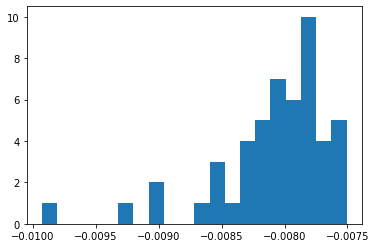

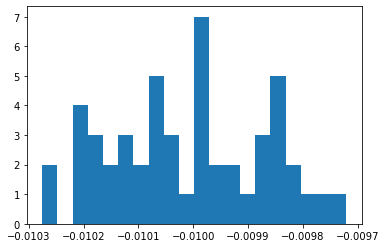

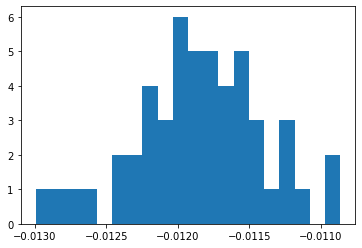

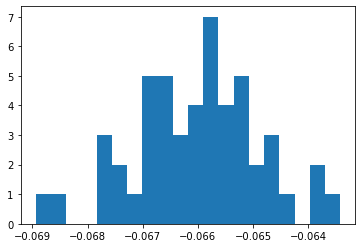

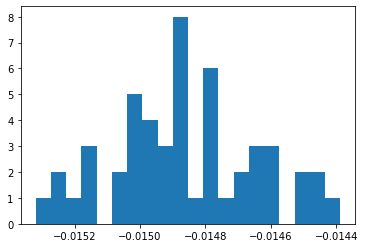

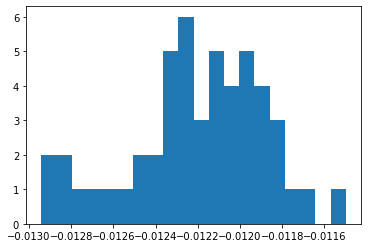

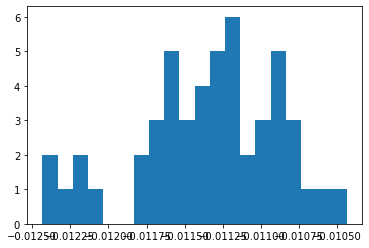

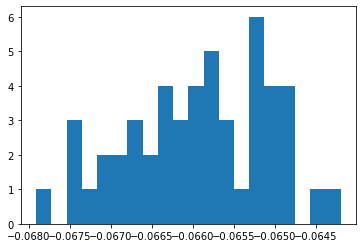

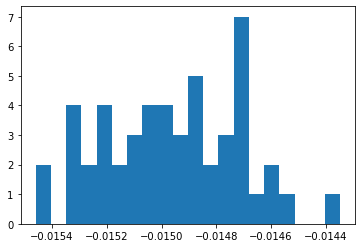

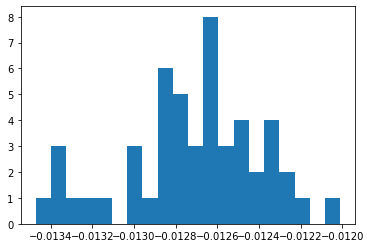

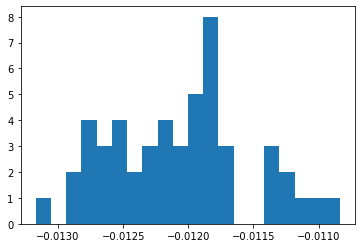

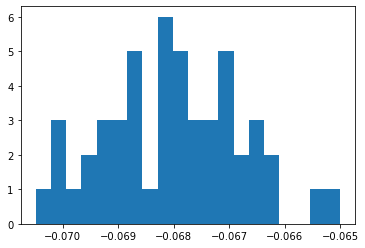

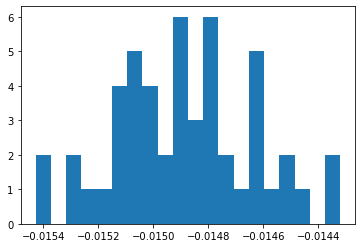

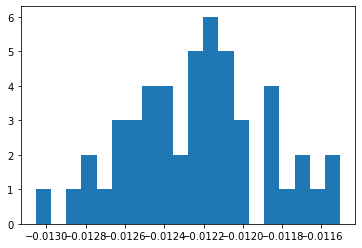

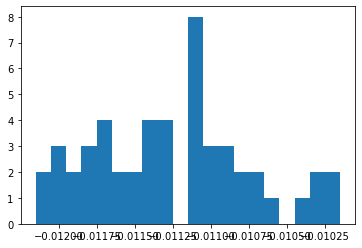

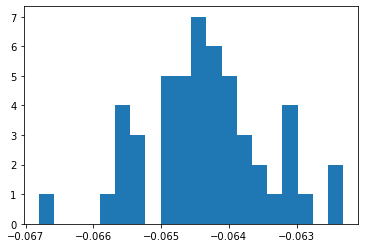

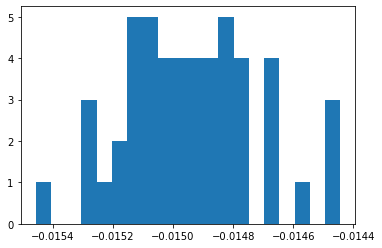

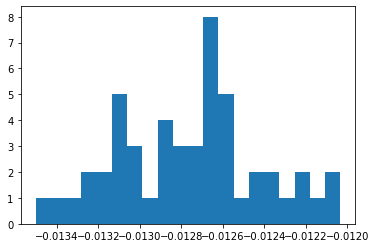

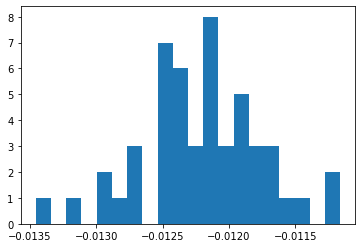

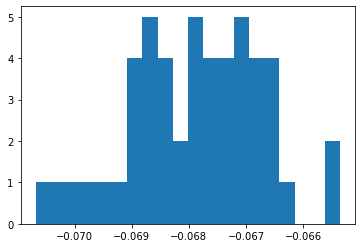

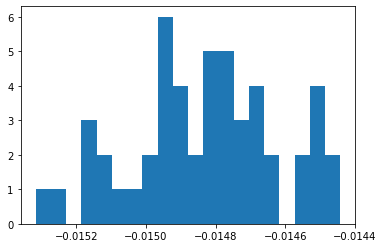

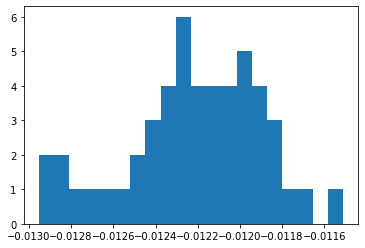

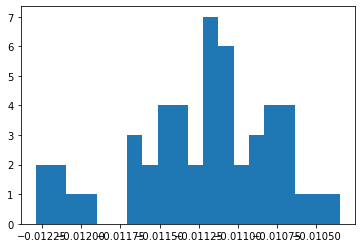

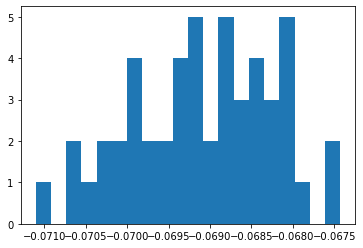

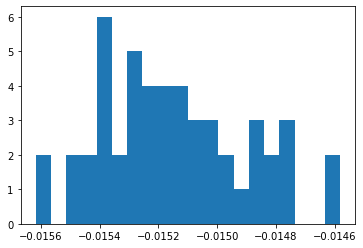

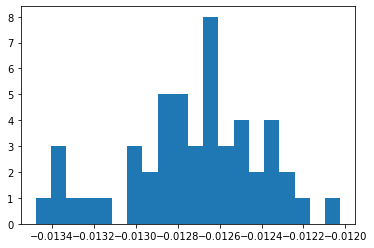

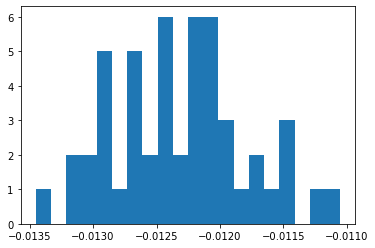

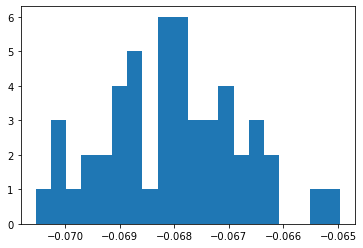

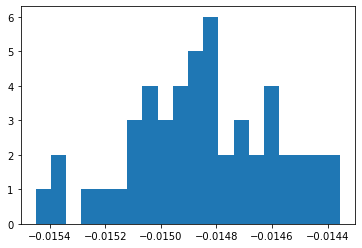

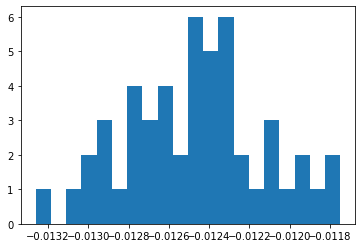

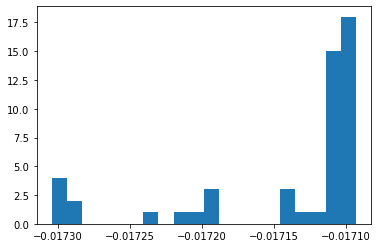

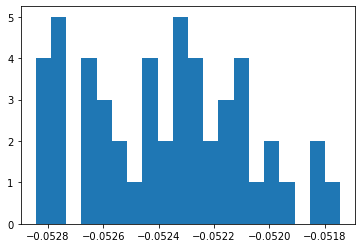

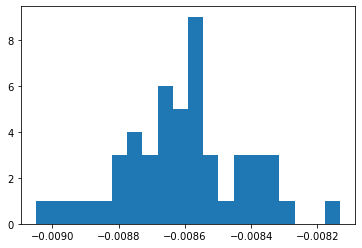

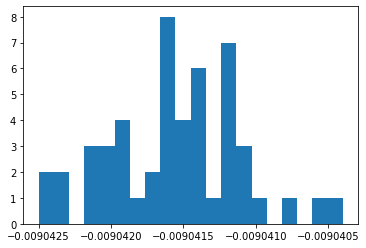

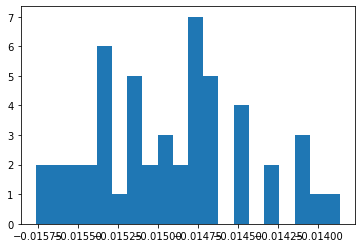

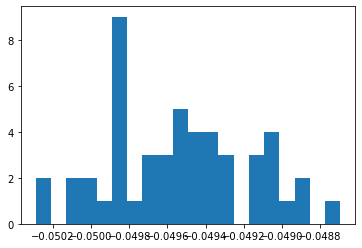

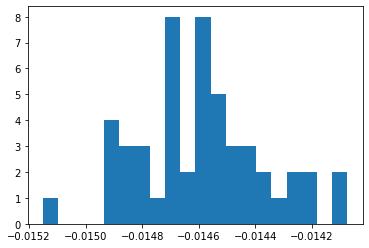

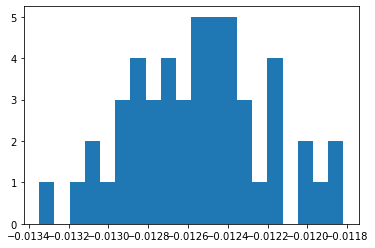

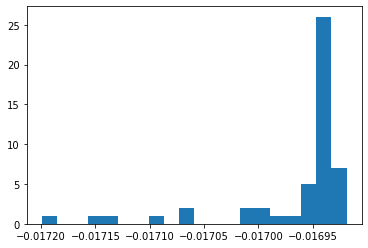

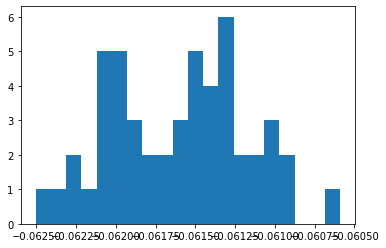

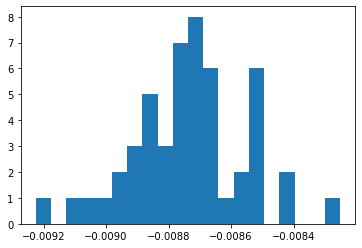

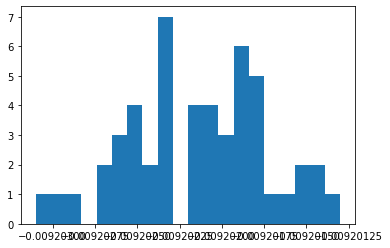

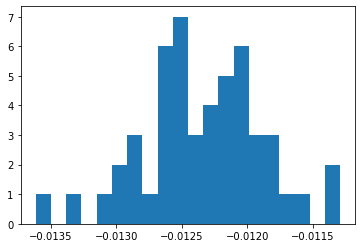

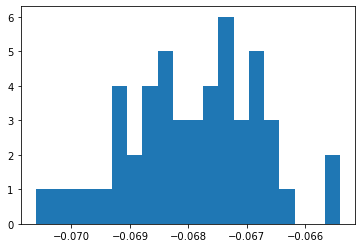

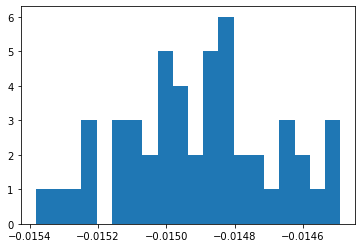

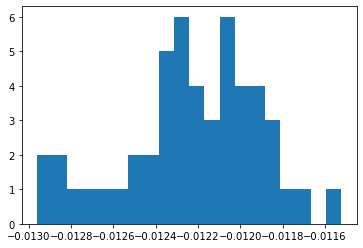

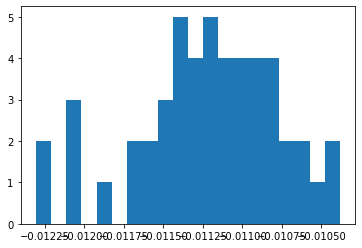

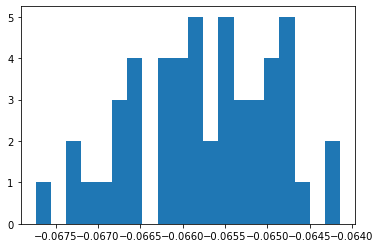

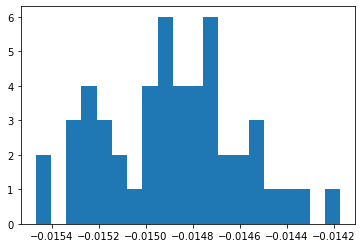

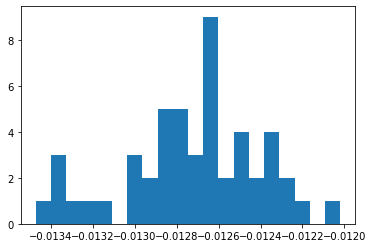

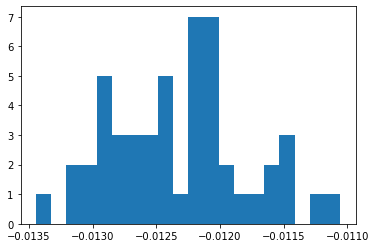

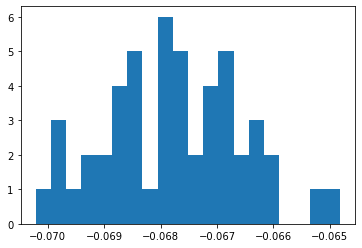

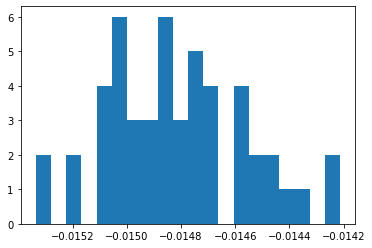

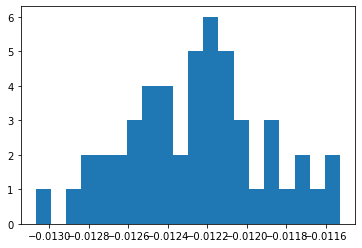

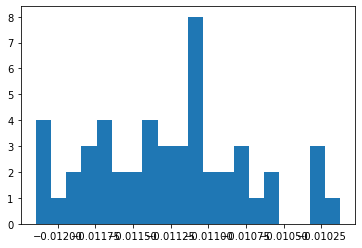

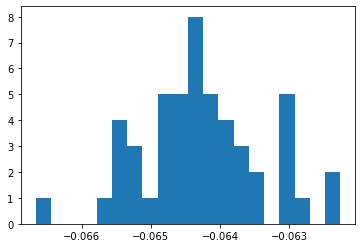

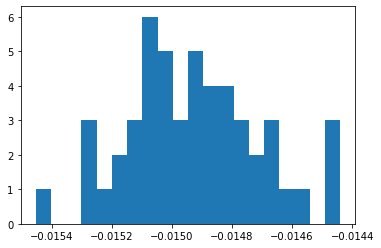

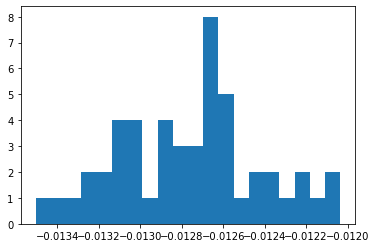

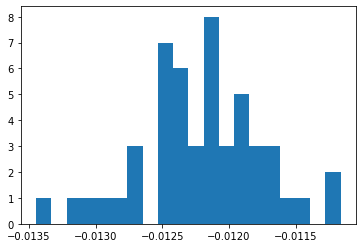

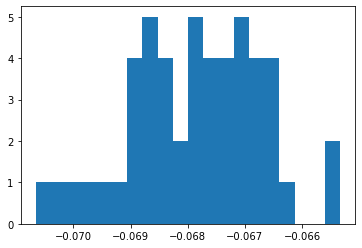

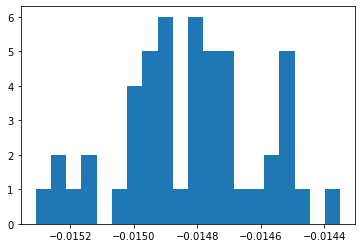

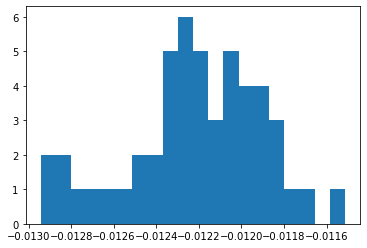

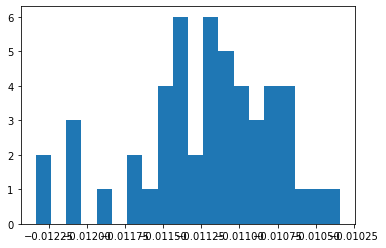

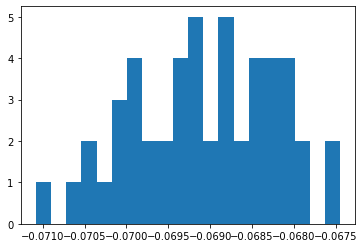

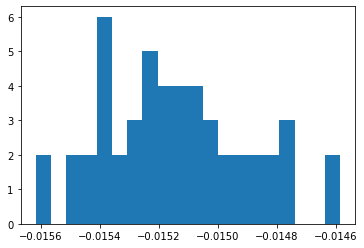

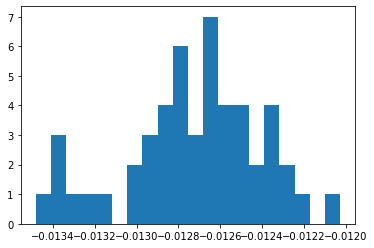

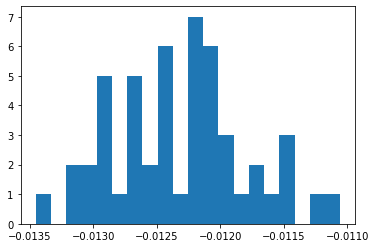

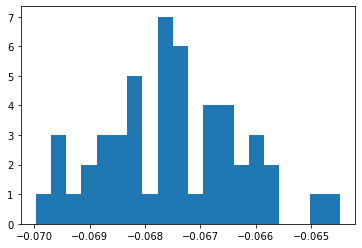

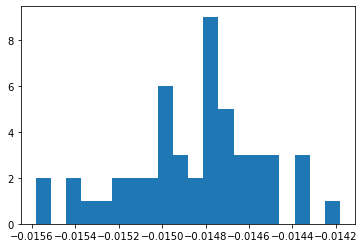

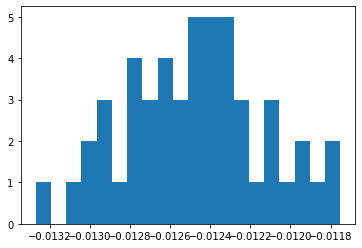

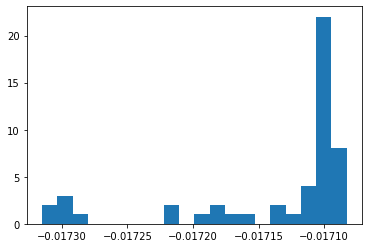

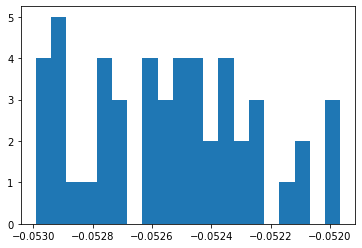

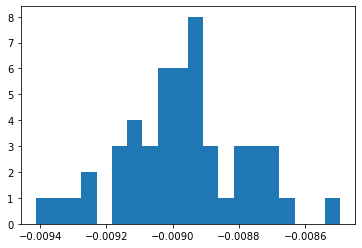

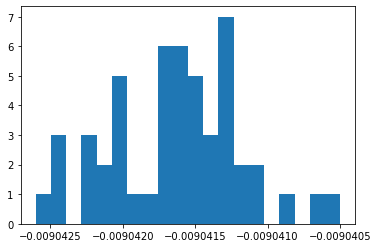

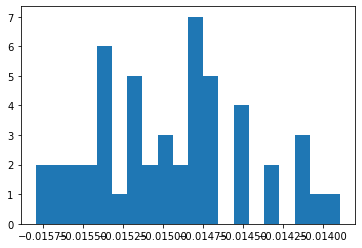

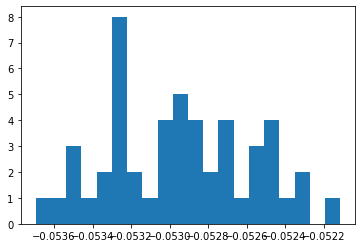

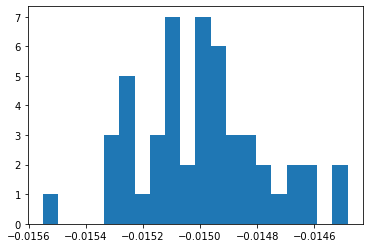

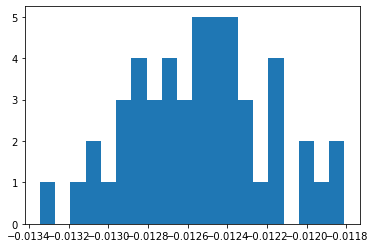

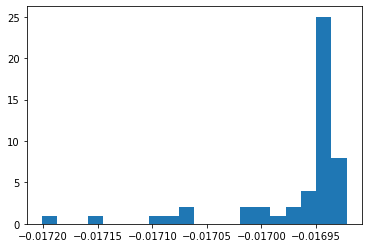

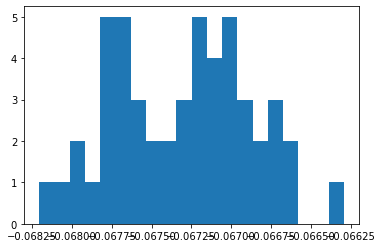

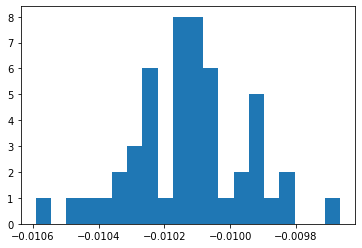

In [3]:
######################HISTOGRAM PLOT#######################################
for i in range(len(Samples_c0)):
	Samples_c0[i].sort()
	Samples_c1[i].sort()

#Number of Data Points:
num_datapoints=len(Samples_c0[0])


#probability that this point is at or below in our data point
actual_freq=[]
x=1/num_datapoints
y=0
for i in range(len(Samples_c0[0])):
	y=y+x
	actual_freq.append(y)
# plt.plot(Samples_c0[0],actual_freq,color="red",marker='o',label='CDF')

for x in range(len(Samples_c0)):
	pyplot.hist(Samples_c0[x], bins=20) 
	pyplot.show()	


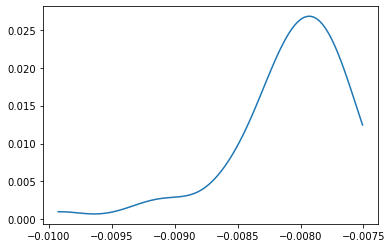

array([0.00100086, 0.00099964, 0.0009877 , 0.00096621, 0.00093683,
       0.00090167, 0.00086318, 0.000824  , 0.00078692, 0.00075467,
       0.00072986, 0.00071485, 0.00071167, 0.00072192, 0.00074678,
       0.00078692, 0.00084254, 0.00091335, 0.00099864, 0.00109724,
       0.00120766, 0.00132806, 0.00145635, 0.00159024, 0.00172729,
       0.00186499, 0.00200078, 0.0021322 , 0.0022569 , 0.00237279,
       0.0024781 , 0.00257153, 0.00265232, 0.00272041, 0.00277647,
       0.00282203, 0.00285944, 0.00289192, 0.00292344, 0.00295863,
       0.00300258, 0.00306068, 0.00313835, 0.0032408 , 0.00337284,
       0.00353867, 0.00374174, 0.00398471, 0.00426943, 0.00459699,
       0.00496787, 0.00538212, 0.00583951, 0.00633971, 0.00688245,
       0.00746761, 0.00809521, 0.00876538, 0.00947822, 0.0102336 ,
       0.01103092, 0.01186886, 0.01274512, 0.01365623, 0.01459742,
       0.01556257, 0.01654421, 0.01753372, 0.01852152, 0.01949734,
       0.02045054, 0.02137046, 0.02224666, 0.02306924, 0.02382

In [4]:
# create fake data
data =Samples_c0[0]
# this create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde( data )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(data), max(data), 100 )
# plot the results
# pyplot.plot( dist_space, kde(dist_space) )
# X=kde.pdf(dist_space)
X=kde(dist_space)/sum(kde(dist_space))
pyplot.plot( dist_space, X )
pyplot.show()
X

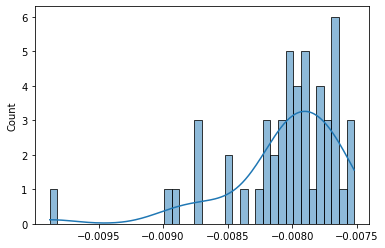

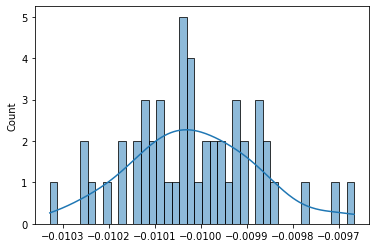

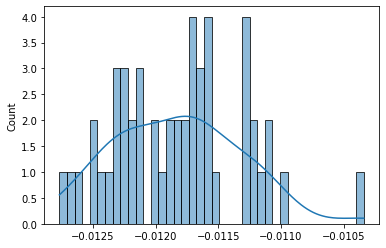

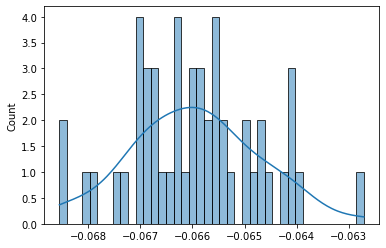

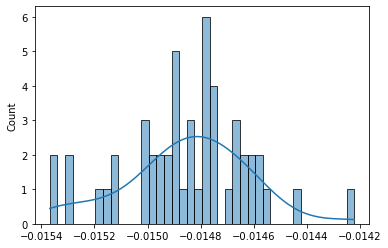

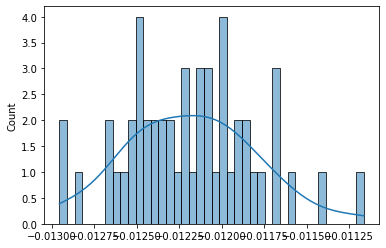

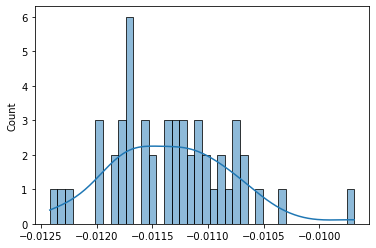

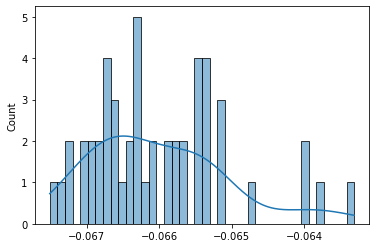

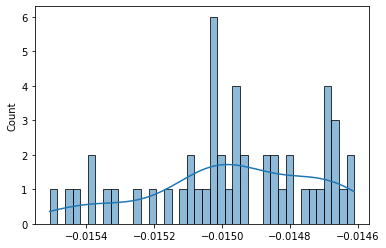

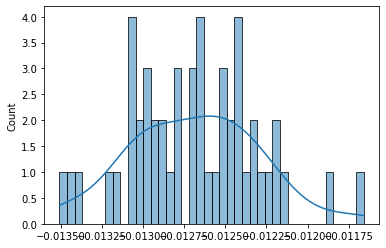

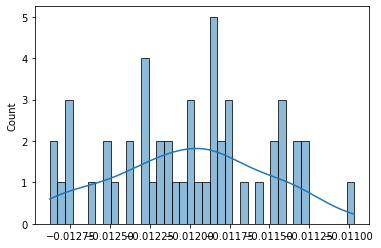

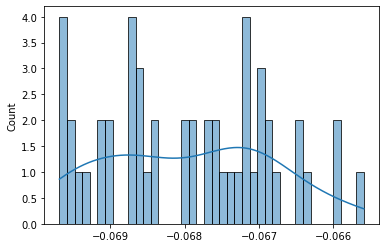

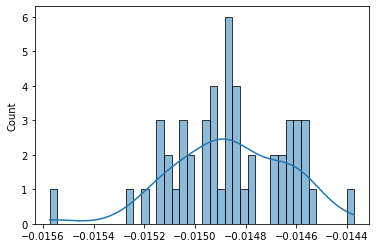

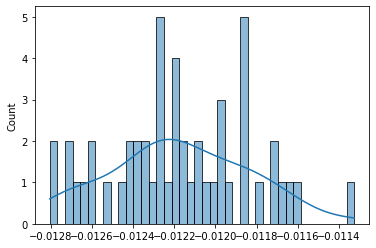

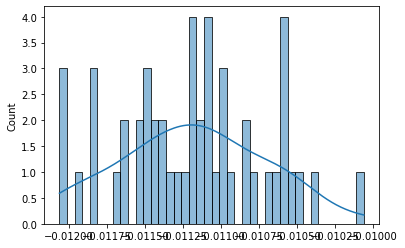

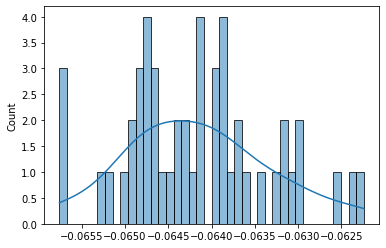

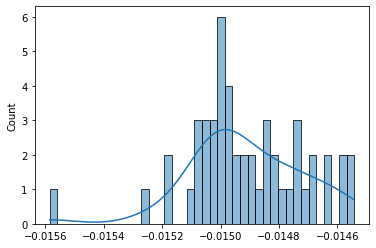

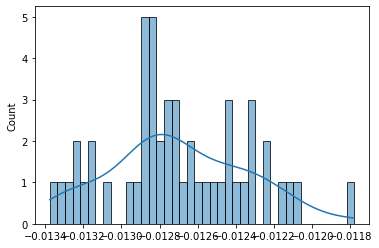

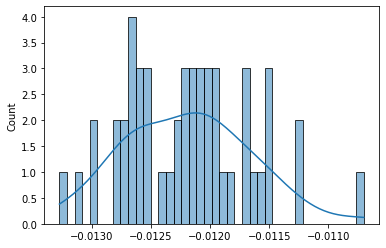

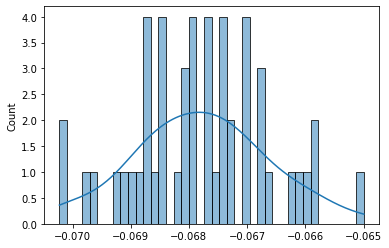

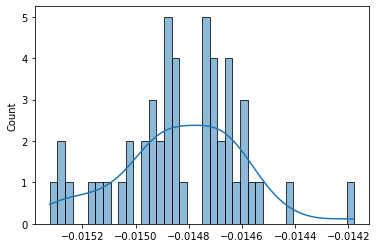

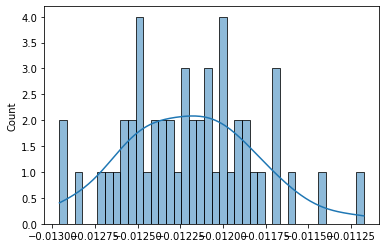

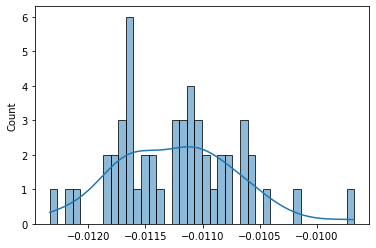

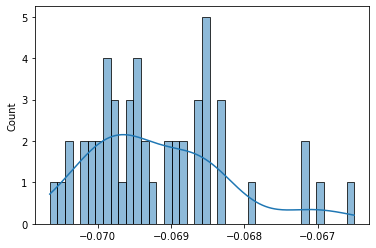

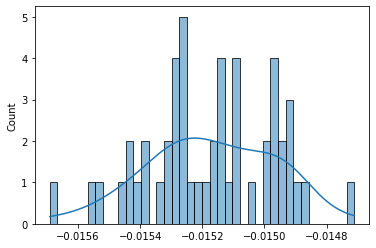

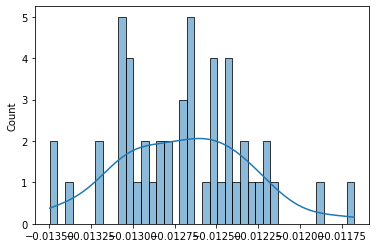

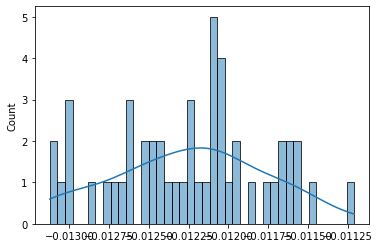

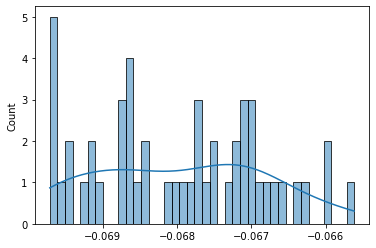

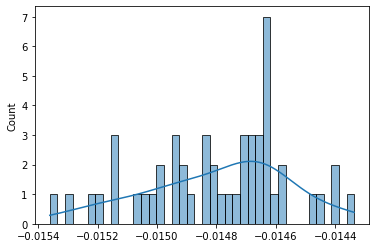

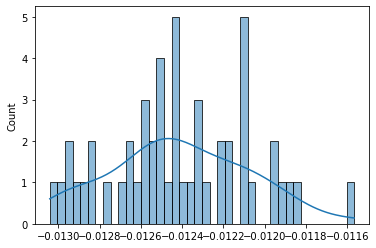

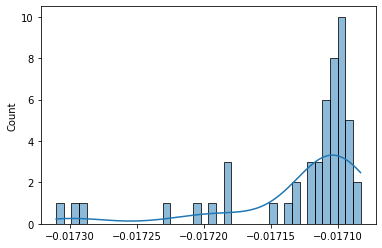

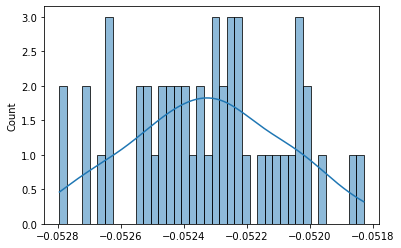

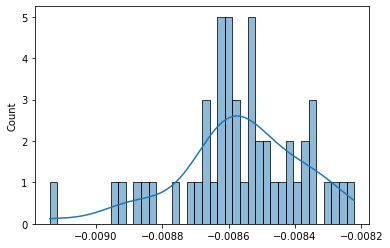

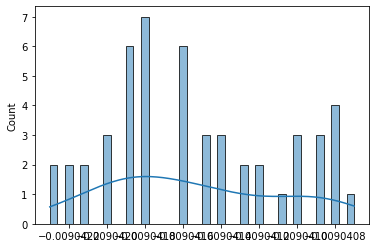

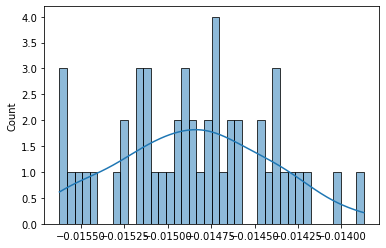

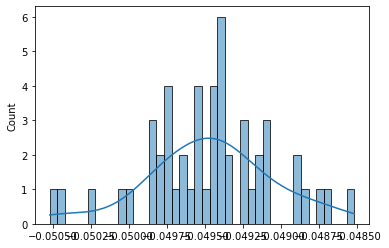

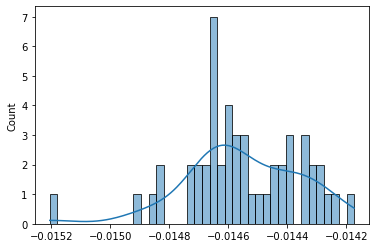

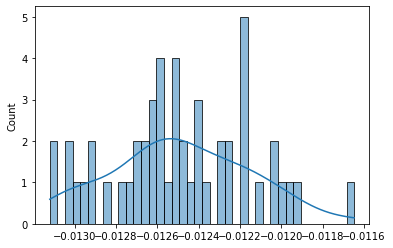

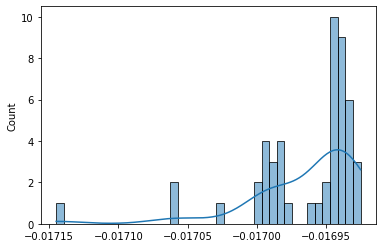

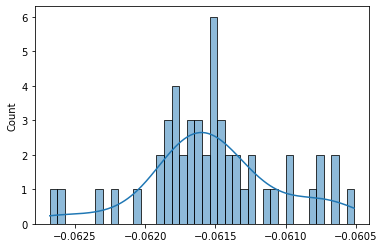

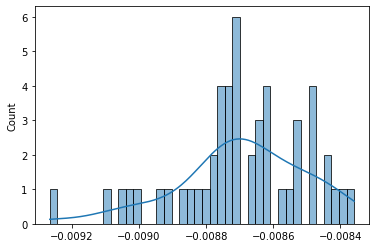

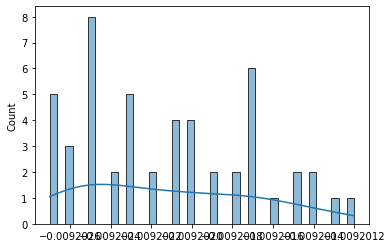

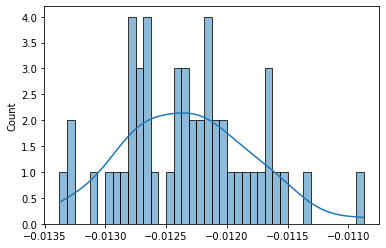

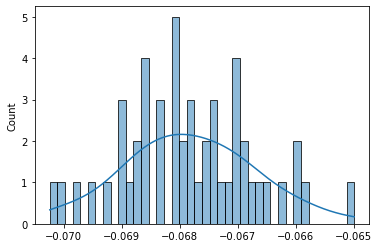

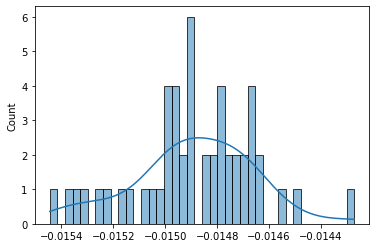

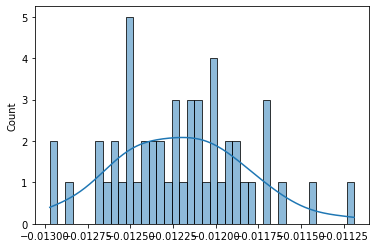

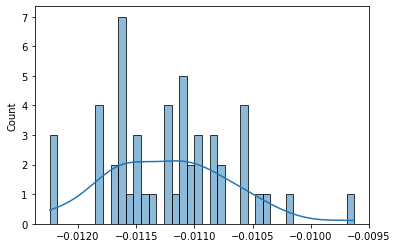

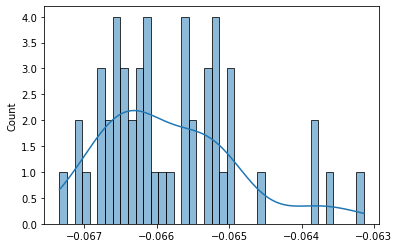

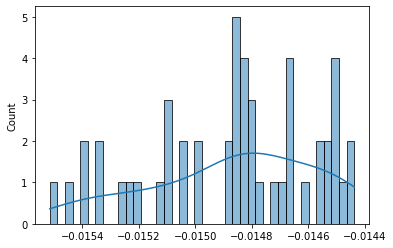

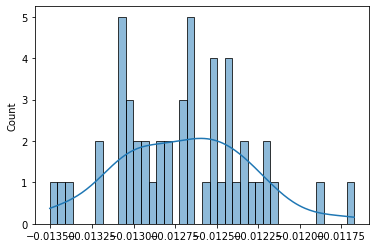

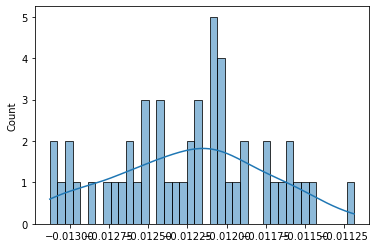

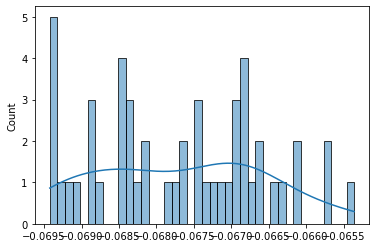

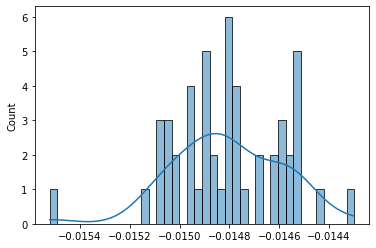

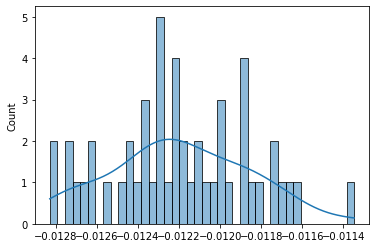

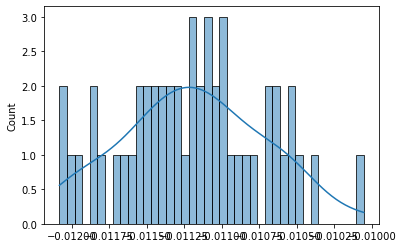

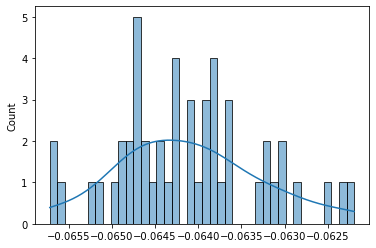

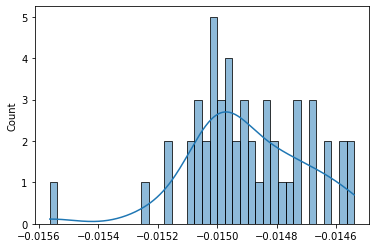

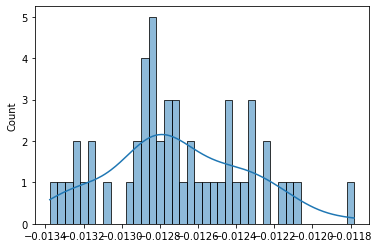

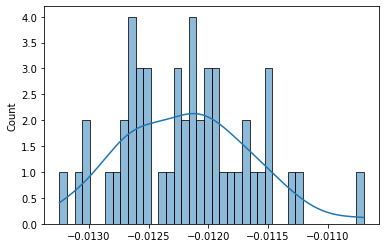

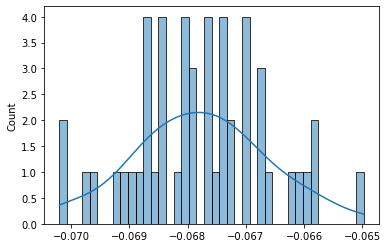

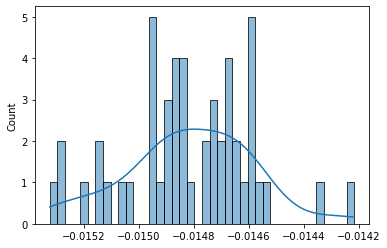

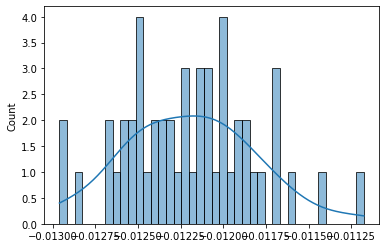

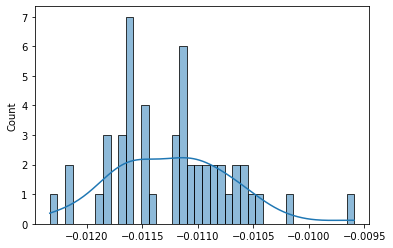

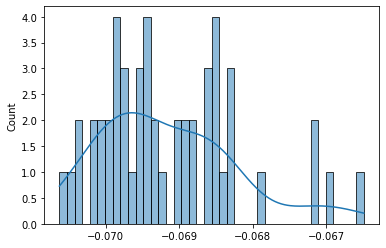

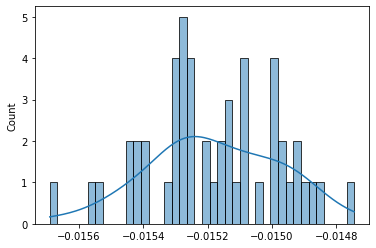

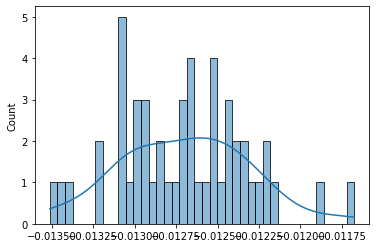

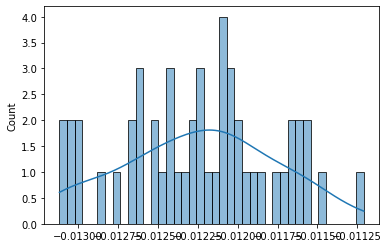

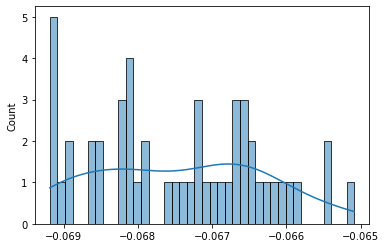

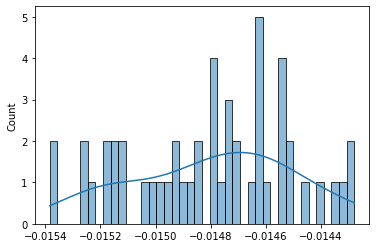

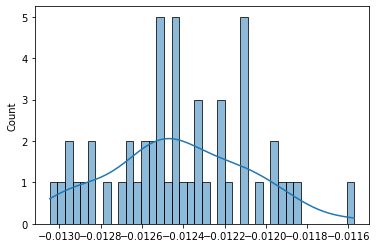

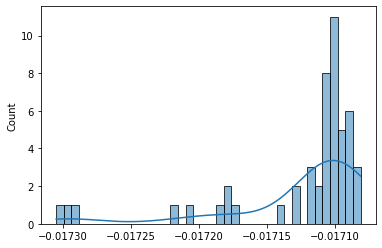

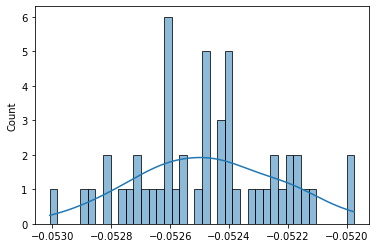

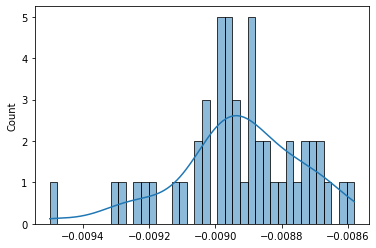

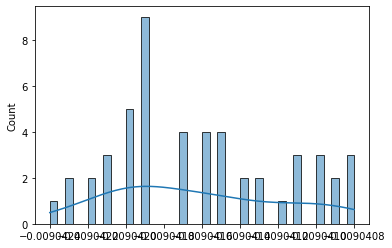

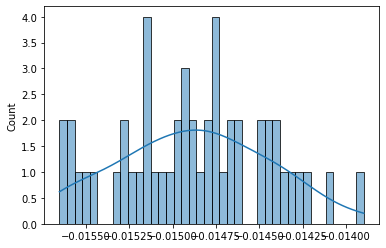

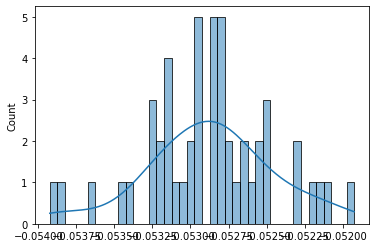

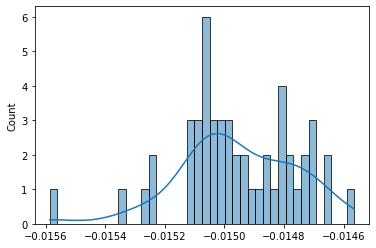

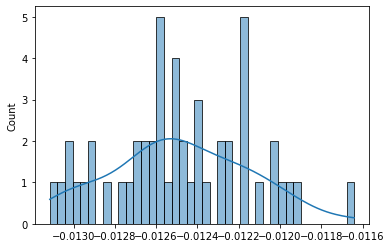

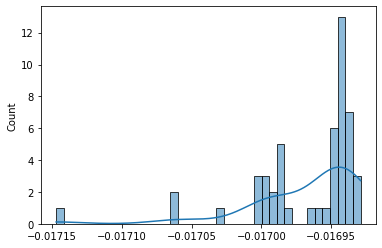

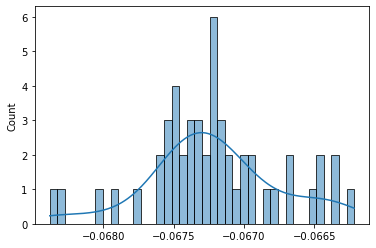

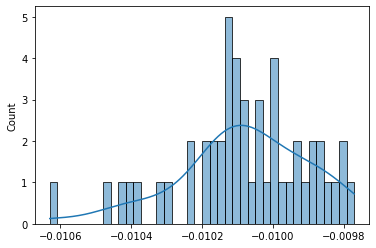

In [7]:
for x in range(len(Samples_c0)):
    data =Samples_c1[x]
    # this create the kernel, given an array it will estimate the probability over that values
    kde = gaussian_kde( data )
    # these are the values over wich your kernel will be evaluated
    dist_space = linspace( min(data), max(data), 100 )
#     sns.kdeplot(data=data,color='b')
    sns.histplot(data=data,kde=True,bins=40)
#     plt.plot( dist_space, kde(dist_space),'-.',color='r', )
    pyplot.show()

In [6]:
def KDE_pdf(data,N):
    kde = gaussian_kde(data)
    # these are the values over wich your kernel will be evaluated
    dist_space = linspace(min(data), max(data), N)
    X=kde(dist_space)/sum(kde(dist_space))
    return X
S=KDE_pdf(Samples_c0[0],100)

In [7]:
sum(S)

1.0